<a href="https://colab.research.google.com/github/PavelStelmakhV/hw303-data-visualization/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   Прочитайте csv файл (используйте функцию read_csv)
*   Выведите первый пять строчек (используется функцию head)
*   Выведите размеры датасета (используйте атрибут shape)

In [23]:
path = '/content/drive/My Drive/'
file_name = 'bestsellers with categories.csv'
df = pd.read_csv(path + file_name)
df_init = df.copy
print(df.head(5))
print(df.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


In [24]:
df['Name'].nunique()

351

О скольки книгах хранит данные датасет? Ответ: 351

In [25]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первичное исследование данных

In [26]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Есть ли в каких либо переменных пропуски? Ответ: Нет

In [27]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры? Ответ: 'Non Fiction', 'Fiction'

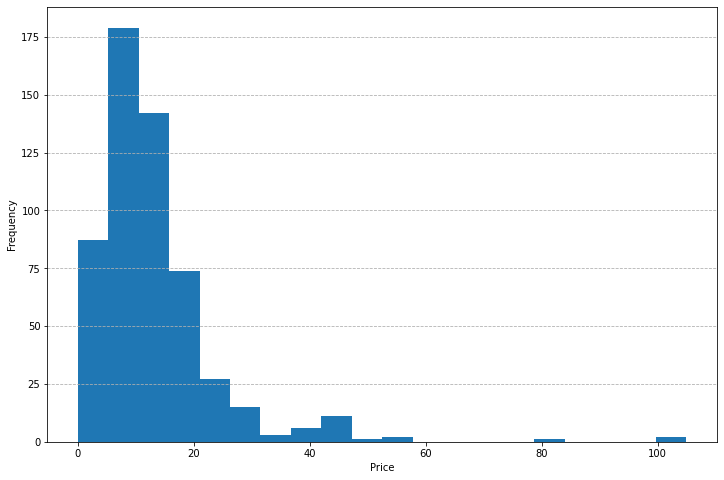

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
df['price'].plot(kind = 'hist', bins=20)
plt.xlabel('Price')
plt.grid(ls = '--', axis = 'y')
plt.show()

In [29]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

105
0
13.1
11.0


Mаксимальная цена? Ответ: 105

Минимальная цена? Ответ: 0

Средняя цена? Ответ: 13.1

Медианная цена? Ответ: 11

# Поиск и сортировка данных

In [30]:
df.user_rating.max()

4.9

Какой рейтинг в датасете наивысший? Ответ: 4.9

In [31]:
len(df.loc[df.user_rating == df.user_rating.max()].name.unique())

28

Сколько книг имеют такой рейтинг? Ответ: 28

In [32]:
df.loc[df.reviews == df.reviews.max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [33]:
temp = df.loc[df.year == 2015]
temp.loc[temp.price == temp.price.max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...

In [34]:
df.query('genre == "Fiction" & year == 2010').shape[0]

20

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

In [35]:
df.query('user_rating == 4.9 & (year == 2010 | year == 2011)')

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [36]:
df.query('price < 8 & year == 2015').sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10) 	

# Агрегирование данных и соединения таблиц

In [37]:
df.groupby('genre').price.agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальная цена для жанра Fiction: Ответ: 82

Минимальная цена для жанра Fiction: Ответ 0

Максимальная цена для жанра Non Fiction: Ответ: 105

Минимальная цена для жанра Non Fiction: Ответ: 0

In [38]:
s = df.loc[~df.duplicated(subset=['name'])] \
.groupby(['author'])['name'].agg(['count']) \
.sort_values('count')['count']
df_count_book = pd.DataFrame(s, columns=["count"])
print(df_count_book.shape)
print(df_count_book)

(248, 1)
                     count
author                    
Abraham Verghese         1
M Prefontaine            1
Madeleine L'Engle        1
Margaret Atwood          1
Margaret Wise Brown      1
...                    ...
Bill O'Reilly            6
Dav Pilkey               6
Stephenie Meyer          7
Rick Riordan            10
Jeff Kinney             12

[248 rows x 1 columns]


Какой размерности вышла таблица? Ответ: 248 x 2

У какого автора больше всего книг? Ответ: Jeff Kinney

Сколько книг у этого автора? Ответ: 12

In [39]:
s = df.loc[~df.duplicated(subset=['name'])] \
.groupby(['author'])['user_rating'].agg(['mean']) \
.sort_values('mean')['mean']
df_mean_rating = pd.DataFrame(s, columns=["mean"])
print(df_mean_rating.shape)
print(df_mean_rating)

(248, 1)
                      mean
author                    
Donna Tartt            3.9
Muriel Barbery         4.0
Gillian Flynn          4.0
Gallup                 4.0
Ian K. Smith M.D.      4.1
...                    ...
Sherri Duskey Rinker   4.9
Bill Martin Jr.        4.9
Dav Pilkey             4.9
Patrick Thorpe         4.9
Jill Twiss             4.9

[248 rows x 1 columns]


У какого автора средний рейтинг минимальный? Ответ: Donna Tartt

Какой у этого автора средний рейтинг? Ответ: 3.9

In [40]:
df_concat = pd.concat([df_count_book, df_mean_rating], axis=1)
df_concat.sort_values(by=['count', 'mean'])
# print(df_concat)

,count,mean
author,,
Donna Tartt,1,3.900000
Muriel Barbery,1,4.000000
Gillian Flynn,1,4.000000
Gallup,1,4.000000
Paula Hawkins,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


Какой автор первый в списке? Ответ: Donna Tartt

# Визуализация данных

In [41]:
import seaborn as sns

In [42]:
df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


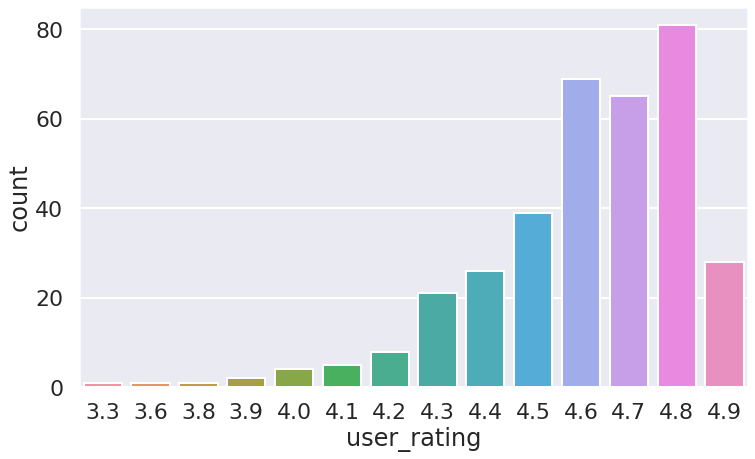

In [55]:
df_no_duplicated = df.loc[~df.duplicated(subset=['name'])].copy()
plt.figure(figsize = (12,7))
sns.set_context("poster")
sns.set_style("darkgrid")
sns.countplot(x='user_rating', data=df_no_duplicated)
plt.show()